In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('final_sp20.ok')

Assignment: Run this cell to set up the notebook, but please don't change it.
OK, version v1.18.1



In [2]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('final_sp20.ok')
_ = ok.auth(inline=True)

TypeError: use() got an unexpected keyword argument 'warn'

# Data 8 Final Exam Spring 2020

* This exam is worth 150 points. You have until Friday, May 15 at 6PM to complete it. Late submissions will not be accepted.
* Do not use features of the Python language that have not been described in this course: we will not accept regrade requests for any issues caused by this.
* A few questions are marked *Just for fun*. These questions are optional and will not be graded.
* This exam is open notes: you may use any resources including the textbook, lecture, lab, homeworks, and projects, and old Piazza posts.
* Piazza will be closed to public posts. For clarifications, typos, and other similar issues with the exam *only*, you may make a private post.
* The collaboration policy for this exam is similar to the homeworks:
  * You may discuss the questions with other students, but any code, explanations, or text you write in this notebook must be your own.
  * You must list the names of any students you discussed the questions with below in Question 0.

* Any clarifications to the exam will be made in [this Google doc](https://docs.google.com/document/d/1hWpU4IBBddMM7UsPoZfwKc8Nc61sI1d1L9nt8iSHhLo/edit?usp=sharing). In cases where we make a correction, we'll also make a Piazza announcement that you'll receive in your email. Please check the document and your email before you start or resume working on the exam.
* Unless otherwise stated, you may add cells or additional lines of code anywhere you want. Make sure you do *not* delete any existing cells. Also, do not reuse any variable names.
* Just like most assignments, unless otherwise stated, the public tests will *not* check for correctness.
* When budgeting your time, note that the later questions are longer and more difficult: make sure you leave enough time to attempt the entire exam.

# Useful functions

These are useful functions from lecture and the textbook. They've all been defined correctly. You may use any of them for any question in the exam, 

**Warning**: Make sure you don't create any variables or functions that have the same names as any of these, or you may not receive credit on parts of the exam.

### Linear regression

These functions are described in lectures 30-34 (Least Squares through Regression Wrapup), and also in Chapter 15 of the textbook.

In [83]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def fitted_value(t, x, y, new_x):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*new_x + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [84]:
residuals(2,4,5)

AttributeError: 'int' object has no attribute 'column'

# Question 0

In [85]:
deck= Table().with_columns("Color",make_array("Red","Black","Black"),
                          "Suite",make_array("D","s","e"),
                          "Rahwa",make_array("W","w","w"))
deck 

Color,Suite,Rahwa
Red,D,W
Black,s,w
Black,e,w


In [88]:
deck.sample(2).group(0)

Color,count
Black,1
Red,1


Please **list the names and email addresses of everyone you collaborated with** when taking this exam. As a reminder, you are allowed to discuss the questions with other students, but you must write all code and fill in all answers by yourself.

*Write your answer here, replacing this text.*

# Question 1

For each of the following cells, assign the specified variable so that the output of the entire cell is as specified. You may only change the first line of each cell: **don't change anything else**.

For example, if the cell said to assign the variable `x` to produce the output 10, and it looked like this:
```
x = ...
x + 7
```
then the correct answer would be to assign `x = 3`, so that the output of the last line would be 10.

#### Question 1.1
(2 points) Assign the variable `a` so that the output of `a + b` is an array of two integers, whose first element is 2020 and whose second element is 8.
<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [23]:
a = make_array(3,7)
# Do not change anything below this line.
b = make_array(2017, 1)
a + b

array([2020,    8])

In [24]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1.2

(2 points) Assign the variable `a2` so that the output of running the below cell is an array of integers whose first element is 2020 and whose second element is 8.
<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [44]:
a2 = make_array(2,0)
# Do not change anything below this line.
t = Table().with_columns(
    'year', np.arange(2000, 2030, 10),
    'course', make_array(8, 100, 102),
)
first_col_index = a2.item(0)
second_col_index = a2.item(1)
year = t.column('year').item(first_col_index)
course = t.column('course').item(second_col_index)
make_array(year, course)

array([2020,    8])

In [39]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [41]:
t

year,course
2000,8
2010,100
2020,102


# Question 2: Books and Graphs

Zeynep goes through her family's entire collection of 370 books and records data for each one. She records her data in a table called `books`. The lengths of the books (in pages) are in a column labeled `Length`. 

For this question, you won't be able to use the table `books`: you must answer based only on the information provided.

She notices that all of the books are between 50 and 400 pages, and uses the following line of code to generate a histogram showing the lengths:

```
books.hist('Length', unit='page', bins=np.arange(50, 400, 25))"
```

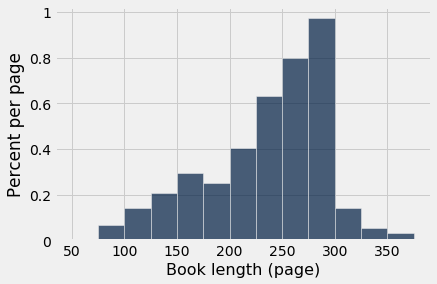

#### Question 2.1

(3 points) What proportion of books are between 200 and 224 pages long (inclusive)? Assign the variable `q21_proportion_books_200_224` to your answer.

Your answer should be a number between 0 and 1, and should be correct to within .01.
<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [27]:
q21_proportion_books_200_224 = .1

In [28]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2.2

(4 points) Based on the histogram and the information above, which must be true? Assign `book_interpretation_choices` to an array of your numbered answer(s).

1. There are more long books (200 pages and over) than short books (under 200 pages) in her family's collection.
2. The percentage of books between 125 and 149 pages (inclusive) is about 20% (that is, 19-21%).
3. The books in her family's collection are like a random sample from the population of all books.
4. In her family's collection, nonfiction books are longer on average than fiction books.
5. The mean length is less than the median length.

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

In [29]:
book_interpretation_choices = make_array(1,5)

#### Question 2.3

(2 points) Which of the following is closest to the median length? Assign the variable `median_length_choice` to either 1, 2, or 3 depending on your choice.

1. 200
2. 260
3. 315

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [30]:
median_length_choice = 2

In [31]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Zeynep finds review data for each book online, and adds it to her `books` table in a column called `Rating`. The values in this column are floating point numbers between 1 and 5, indicating the number of "stars" the book got, on average.

She computes the following quantities, which are reproduced for you in the cell below. Remember, you can't use the `books` table, only the quantities defined for you.

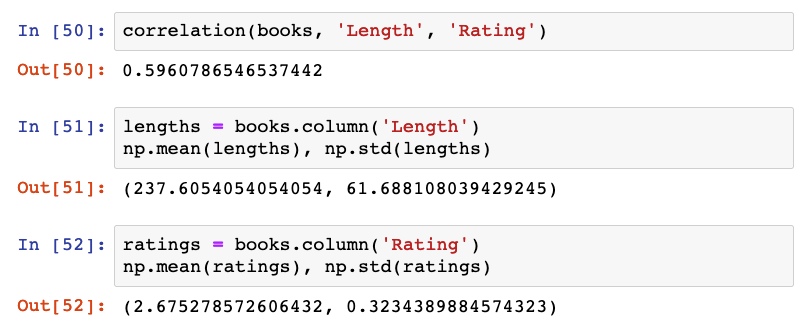

In [32]:
r = 0.596
length_mean = 237.605
length_sd = 61.7
rating_mean = 2.675
rating_sd = 0.323

#### Question 2.4

(2 points) Using linear regression, what would she predict for the average rating (in stars) of a book with 300 pages? Assign the variable `book_with_300_pages_avg_rating` to your answer.

*Hint*: try to avoid names like `correlation`, `slope`, `intercept` for your variables, since those are the names of functions we've defined for you at the top of the notebook.
<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [33]:
book_with_300_pages_avg_rating = r*rating_sd/length_sd*300+(rating_mean-(r*rating_sd/length_sd)*length_mean)

book_with_300_pages_avg_rating

2.869676445056726

In [174]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2.5

(2 points) Using linear regression, what would she predict for the length of a book (in pages) with an average rating of 4 stars? Assign the variable `book_with_4_stars_length` to your answer.

*Hint*: try to avoid names like `correlation`, `slope`, `intercept` for your variables, since those are the names of functions we've defined for you at the top of the notebook.

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [175]:
book_with_4_stars_length = r*length_sd/rating_sd*4+(length_mean-(r*length_sd/rating_sd)*rating_mean)
book_with_4_stars_length

388.45481424148613

In [176]:
ok.grade("q2_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2.6

(2 points) Fill in the blank with the smallest possible value that's guaranteed to be correct. Assign the variable `book_rating_blank` to your answer.

Without knowing anything else about the distribution of ratings, we can guarantee that 75% of the ratings will be between 2.029 stars and \_\_\_ stars.

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [177]:
book_rating_blank = 2.675+0.323+0.323
book_rating_blank

3.3209999999999997

In [34]:
rating_mean + 2 * rating_sd

3.3209999999999997

In [178]:
ok.grade("q2_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2.7

(4 points) Fill in the blank with the smallest value that's guaranteed to be correct. Assign the variable `range_of_accurate_book_predictions` to your answer.

When predicting average rating from book length, at least 93.75% of the predictions will be correct to within ___ stars of the true value.

*Hint*: $93.75\%$ is the same as $1 - \frac{1}{16}$.

<!--
BEGIN QUESTION
name: q2_7
manual: false
-->

In [37]:
range_of_accurate_book_predictions = 4*np.sqrt(1-r**2)*rating_sd
range_of_accurate_book_predictions

1.037455887725353

In [180]:
ok.grade("q2_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 2.8

(3 points) Zeynep uses her data to conduct a hypothesis test, but refuses to tell you any of the details. All she tells you is:
* Larger values of the test statistic favor the alternative hypothesis.
* Her $p$-value cutoff is 0.05.
* Her histogram of 5,000 simulated values of her test statistic under the null hypothesis looks like this (assume all values are shown in the histogram):

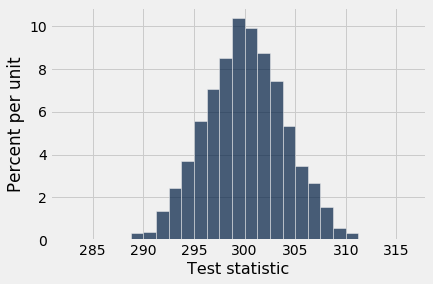

Based only on this information, which of the following must be true? Assign `mystery_hypothesis_test_conclusions` to an array with your numbered answer(s).

1. If the test statistic in her data is 310, then the data are more consistent with the alternative hypothesis than the null hypothesis.
2. If the test statistic in her data is 270, then we should conclude the data are more consistent with the null hypothesis than the alternative hypothesis.
3. If this was an A/B test where the test statistic was the difference in the means of two groups, and the test statistic in her data is 312, then she can conclude that there's a causal link between the groups and the value she's measuring for her test statistic.

<!--
BEGIN QUESTION
name: q2_8
manual: true
-->
<!-- EXPORT TO PDF -->

In [181]:
mystery_hypothesis_test_conclusions = make_array(1,2)

# Question 3: Gardening

Silla wants to get better at keeping his plants alive. So, he decides to try using a classifier to predict whether the plants into his garden will survive. He spends 8 weeks, from March 17 until May 12, collecting data for each plant on:

* **`Water`**: a float, the average amount of water he gave it per week (in ounces),
* **`Pot Size`**: a float, the size of the pot the plant was in (in gallons)
* **`Survived`**: a boolean, whether or not the plant was alive on May 12

He trains a $k$-nearest neighbor classifier on his data, and uses $k=3$.

He also draws the following scatterplot, marking plants that survived with blue circles and plants that died with red squares. Assume all his plants are shown here:

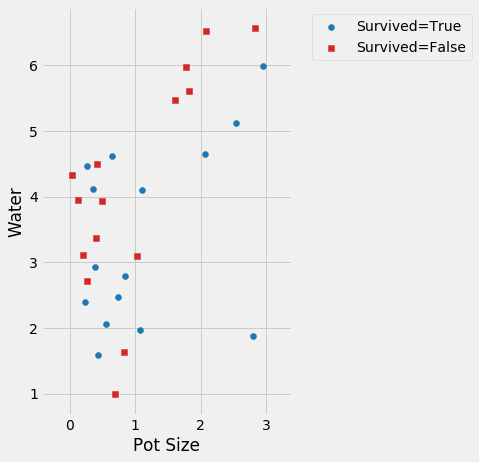

Silla wants to use the classifier to make a predictions. For each of the following questions, you should answer one of:
* `True`, if the prediction is that the plant would survive
* `False`, if the prediction is that the plant would die,
* A string with an explanation if it isn't appropriate to use his classifier to answer the question.

If you answer `True` or `False`, then you should *not* include any explanation: it will not be graded.

For example, if a question asked "How tall will his tallest plant be?", then your answer should be `"The classifier can't predict how tall plants are, only whether or not they survive"`.

#### Question 3.1

(3 points) Suppose Silla had planted an extra plant in a 0.25-gallon pot that received 3.5 ounces of water per week. Would the classifier predict that this plant will survive? 

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->
<!-- EXPORT TO PDF -->

False

#### Question 3.2

(3 points) Silla was taking care of his roommate's plant (which isn't shown in the graph above). It was in a 2.5-gallon pot, and he gave it 5 ounces of water per week. Would the classifier predict that this plant will survive? 

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

True

#### Question 3.3

(3 points) Silla was taking care of his other roommate's plant (which also isn't shown in the graph above). It was in a 6-gallon pot, and he gave it 6 ounces of water per week. Would the classifier predict that this plant will survive? 

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->
<!-- EXPORT TO PDF -->

"You can't classify wether the plant will survive or won't based off Silla chart which is limited to 3-gallon pot, so its unknown if other roommate's plant will survive or won't"

#### Question 3.4

(3 points) Silla graduates and moves from Berkeley to Miami, Florida. After moving in to his new apartment, he buys some new plants. He puts one in a 1-gallon pot, and gives it 2 ounces of water per week for 8 weeks (from June 1 to July 27). Would the classifier predict that this plant will survive? 

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

"No the classifier won't because its different time and palce as it starts from June 1 to July 27 while his only limited to March 17 to May 12 , its unknown wether the plant will survive or won't"

# Question 4: Electricity

The table `electricity` contains data for 200 randomly sampled energy utilities from the US in 2017.

In [38]:
electricity = Table.read_table('electricity2017_sample.csv').drop('Power in')
electricity.show(3)

Name,State,Type,Residential customers,Revenue,Power generated,Power bought,Summer demand,Winter demand
Village of Freeport - (NY),NY,Municipal,12928,34074,31785,261412,58.1,47.9
Iowa Lakes Electric Coop,IA,Cooperative,9247,63818.7,0,642428,99.5,108.3
"XOOM Energy Maine, LLC",NC,Retail Power Marketer,1407,1352,0,14347,0,0


It has the following columns:
* **`Name`**: a string, the name of the utility
* **`State`**: a string, the two-letter abbreviation for the state the utility operates in
* **`Type`**: a string, the type of utility 
* **`Residential customers`**: an int, the number of residential customers the utility serves
* **`Revenue`**: a float, the total revenue for the utility in 2017 measured in thousands of dollars
* **`Power generated`**: a float, the amount of power the utility generated itself (in megawatt-hours)
* **`Power bought`**: a float, the amount of power the utility bought or exchanged from other utilities (in megawatt-hours)
* **`Summer demand`**: a float, representing peak demand in the summer (in megawatts)
* **`Winter demand`**: a float, representing peak demand in the winter (in megawatts)

#### Question 4.1

(3 points) Janea wants to use this random sample to understand energy utilities more broadly. In particular, she wants to estimate the following quantities from this particular sample:

1. The maximum number of residential customers served by any energy utility in the US
2. The average (mean) demand in the summer across all energy utilities in the US
3. The median revenue of all energy utilities in Hawaii (*Hint*: the two-letter abbreviation for Hawaii is HI).
4. The slope of a linear prediction of winter demand from summer demand, across all energy utilities in the US

If she decides to use the bootstrap to construct a 95% confidence interval from this sample, which of the quantities above are good choices for this technique? Assign `good_electricity_bootstrap_candidates` to an array of your numbered answer(s).



<!--
BEGIN QUESTION
name: q4_1
manual: true
-->
<!-- EXPORT TO PDF -->

In [183]:
good_electricity_bootstrap_candidates = make_array(1,2)

#### Question 4.2

(2 points) Javier is on the board of a US energy utility, and wants to predict what his revenue will be based on summer demand. He isn't sure whether linear regression is a good fit: create a plot to help convince him that it is.

*Hint*: you shouldn't need more than 3-4 lines to solve this, and our solution took fewer than that.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->
<!-- EXPORT TO PDF -->

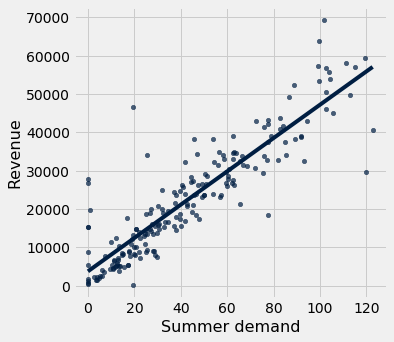

In [186]:
# Code to create a plot goes here.
electricity.select("Revenue","Summer demand").scatter("Summer demand","Revenue",fit_line=True)

#### Question 4.3

(5 points) Javier's utility had 90 megawatts of demand this summer. He uses the bootstrap to construct a 95% confidence interval for the prediction of its revenue based on linear regression, and finds that the interval is \\$40.6 to \\$45 million dollars (remember, the `Revenue` column is in thousands of dollars).

Which of the following must be true? Assign `revenue_demand_prediction_choices` to an array of your numbered answer(s).

1. 95% of utilities in the sample had revenue between \\$40.6 and \\$45.0 million dollars.
2. In 95% of Javier's bootstrap samples, the height of the regression line at $x=90$ was between 40600 and 45000 (that is, \\$40.6 and \\$45 million dollars).
3. In the population of all US energy utilities, 95% of the utilities with 90 megawatts of summer demand have between \\$40.6 and \\$45 million dollars of revenue.
4. There is a 95% chance that Javier's utility's revenue this year will be between \\$40.6 and \\$45 million dollars.
5. When drawing a random sample of 200 US energy utilities from the population of all US energy utilities, there is a 95% chance that in the sample, the linear regression prediction for utilities with 90 megawatts of summer demand will be between \\$40.6 and \\$45 million dollars.

<!--
BEGIN QUESTION
name: q4_3
manual: true
-->
<!-- EXPORT TO PDF -->

In [187]:
revenue_demand_prediction_choices = make_array(3,5)

#### Question 4.4

(4 points) Javier wants to estimate the difference between the average size (number of customers) of municipal utilities (owned by local governments) and cooperative utilities (owned by customers). In other words, he wants to compute the municipal average number of customers minus the cooperative average number of customers. 

Help him by completing the function below.

For this question, the public tests check for correctness.

<!--
BEGIN QUESTION
name: q4_4
manual: false
-->

In [188]:
def compute_municipal_cooperative_difference(tbl):
    """ 
    Given a table with columns 'Type' and 'Residential customers', 
    returns the difference between  the average size of municipal utilities
    and cooperative utilities.
    """
    select_column= tbl.select("Type","Residential customers")
    municipal_utilities= np.average(select_column.where("Type","Municipal").column("Residential customers"))
    cooperative_utilities= np.average(select_column.where("Type","Cooperative").column("Residential customers"))
    return municipal_utilities-cooperative_utilities

In [189]:
compute_municipal_cooperative_difference(electricity)

-4284.594185583433

In [190]:
ok.grade("q4_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4.5

(4 points) Javier wonders: if his sample had been different, could he have gotten a different answer? Complete the function below, which computes 1,000 bootstrap samples of the statistic from the previous part and saves them in the array `bootstrap_utility_diff` which is returned.

<!--
BEGIN QUESTION
name: q4_5
manual: false
-->

In [194]:
def bootstrap_u_d():
    bootstrap_utility_diff = make_array()
    for i in np.arange(1000):
        
        resample_electricity = electricity.sample()
        difference_resample= compute_municipal_cooperative_difference(resample_electricity)
        bootstrap_utility_diff =np.append(bootstrap_utility_diff,difference_resample)
    return bootstrap_utility_diff

# Don't edit this code below
bootstrap_utility_differences = bootstrap_u_d()

In [195]:
ok.grade("q4_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4.6

(3 points) Javier's favorite number is 92, so he wants to make a 92% confidence interval to estimate the value of the statistic above in the population. Use the `bootstrap_utility_differences` to assign `bootstrap_utility_left` and `bootstrap_utility_right`:

<!--
BEGIN QUESTION
name: q4_6
manual: false
-->

In [196]:
bootstrap_utility_left = percentile(4,bootstrap_utility_differences)
bootstrap_utility_right = percentile(96,bootstrap_utility_differences)
(bootstrap_utility_left, bootstrap_utility_right)

(-5635.67256871036, -2920.921855921856)

In [197]:
ok.grade("q4_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



# Question 5: The Office

The Data 8 instructors start arguing over one of their favorite TV shows, and decide to resolve their debates using data. They find data on how many words each character speaks in each episode of the show The Office in the table `office`. 

In [198]:
office = Table.read_table('the_office.csv')
office.show(3)

season,episode,overall_episode,speaker,num_words
1,1,1,TOTAL,2861
1,1,1,Michael,1598
1,1,1,Jim,335


The table contains the following columns:
* **`season`**: an int, indicating which season of the show
* **`episode`**: an int, indicating which episode within that season the data is for
* **`overall_episode`**: an int, indicating the episode number within the entire show (for example, since the first season has 6 episodes, the first episode of the second season is the seventh episode overall)
* **`speaker`**: a string, the name of the character (or the string `TOTAL`, indicating the row contains the total number of words for the episode)
* **`num_words`**: an int, the number of words that character spoke in that episode

For example, the second row indicates that the character Michael said 1598 words in the first episode of the first season.

(4 points) In order to make line and scatter graphs of how much the characters speak over the course of the show, we'll need to write a function that takes an array of character names and returns a table with one row per overall episode number. It should have one column for the episode numbers, and a column for each character in the array, where the values are the total number of words spoken by that character in that episode. 

For example, calling `get_character_episode_table(make_array('Jim', 'Dwight', 'Pam'))` should give you a table whose first few rows look like:

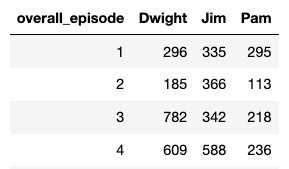

#### Question 5.1

This means that Dwight spoke 296 words in the first episode, and Jim and Pam spoke 335 and 295 respectively.

(*Hint*: the predicate `are.contained_in` might be helpful.)

<!--
BEGIN QUESTION
name: q5_1
manual: false
-->

In [199]:
def get_character_episode_table(character_names):
    """
    Takes an array of character names, and returns a table like the one shown above.
    """
    Sperated_columns_office= office.where("speaker",are.contained_in(make_array(character_names)))
    table_with_columns_names = Sperated_columns_office.select("speaker","overall_episode","num_words")
    pivot_table= table_with_columns_names.pivot("speaker","overall_episode","num_words",sum)
    return  pivot_table


In [200]:
ok.grade("q5_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



*Just for fun*: Use the function you just wrote to visualize the relationships between how much characters speak, and how that changes over the course of the show.


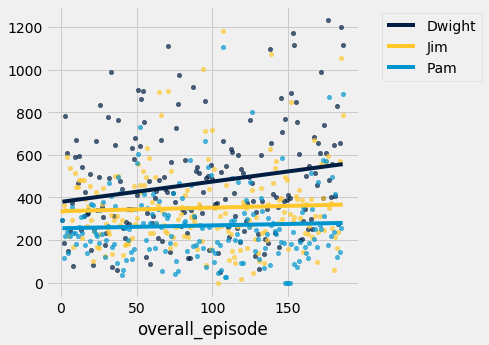

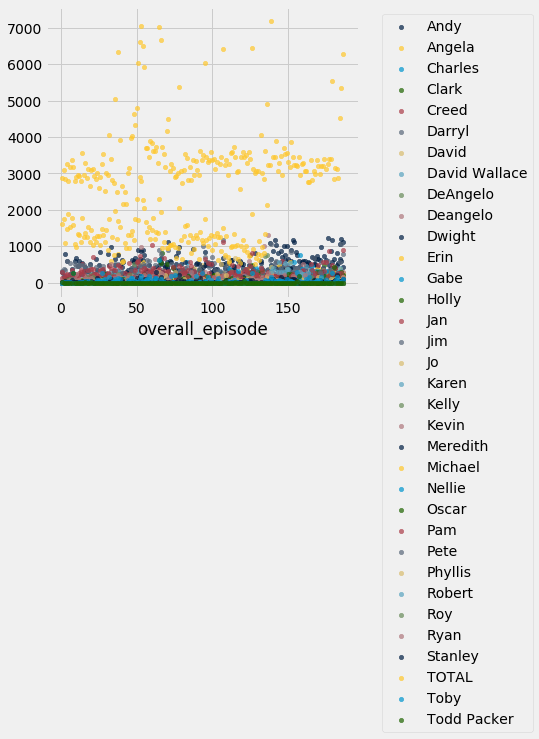

In [201]:
# This cell is for answering the "Just for fun" question above. Nothing in it will be graded.

table=get_character_episode_table(make_array("Jim","Dwight","Pam"))
table.scatter("overall_episode",fit_line=True)
table1=get_character_episode_table(make_array(office.column("speaker")))
table1.scatter("overall_episode")

Ramesh and Swupnil start arguing over Season 8's popularity, and find the following data to help support their claims: 

In [202]:
office_viewers = Table.read_table('office_wikipedia.csv')
office_viewers.show(3)

Overall number,Name,Writer,Millions of viewers
1,Pilot,Ricky Gervais & Stephen Merchant and Greg Daniels,11.2
2,Diversity Day,B. J. Novak,6
3,Health Care,Paul Lieberstein,5.8


The table has the following columns:
* **`Overall number`**: an int, indicating the episode number within the entire show (for example, since the first season has 6 episodes, the first episode of the second season is the seventh episode overall)
* **`Name`**: a string, the episode name
* **`Writer`**: a string, the person or people who wrote the script for that episode
* **`Millions of viewers`**: a float, the number of viewers, in millions, who watched that episode when it aired on live TV (on NBC).

*Just for fun*: Which episode had the most viewers and why?

In [203]:
# This cell is for answering the "Just for fun" question above. Nothing in it will be graded.
office_viewers.sort("Millions of viewers",descending=True).column(1).item(0)
#Because it aired following the Super Bowl, "Stress Relief" was the most viewed episode of The Office with 22.9 million viewers according to Nielsen Media Research during its original broadcast.

'Stress Relief‡'

#### Question 5.2

(3 points) Using the two tables above (`office_viewers` and `office`), make a new table that has one row for each episode of the show, and three columns: **`season`**, **`overall_episode`**, and **`Millions of viewers`**. The columns may be in any order, but they must contain the correct values as described by their names.

<!--
BEGIN QUESTION
name: q5_2
manual: false
-->

In [204]:
# The overall_and_season table was helpful in our solution,
# but you don't have to use it.
overall_and_season = office.group(['overall_episode', 'season']).select(0, 1)
office_season_viewers = overall_and_season.join("overall_episode",office_viewers,"Overall number").select(0,1,4)
office_season_viewers.show(3)

overall_episode,season,Millions of viewers
1,1,11.2
2,1,6
3,1,5.8


In [205]:
ok.grade("q5_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 5.3

(2 points) Ramesh thinks that Season 8 is significantly less popular (measured by number of viewers) than any other season of the show. Swupnil disagrees. They decide on the following null and alternative hypotheses for their test:

**Null hypothesis**:

The average viewer count for Season 8 is like the average viewer count for the same number of episodes picked at random from the entire show.

**Alternative hypothesis**:

No, the average viewer count for Season 8 is lower.

Which hypothesis supports Swupnil's argument? Assign the variable `season_8_swupnil` to either `'null'` or `'alternative'`:

<!--
BEGIN QUESTION
name: q5_3
manual: false
-->

In [206]:
season_8_swupnil = "null"

In [207]:
ok.grade("q5_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 5.4

(3 points) Based on the null and alternative hypothesis above, describe a test statistic they could use to conduct a hypothesis test:

<!--
BEGIN QUESTION
name: q5_4
manual: true
-->
<!-- EXPORT TO PDF -->

You can perform test statistic where you take the average viewer count for season 8 with the average viewer 
count for the same number of episodes picked at random and subtract it from any another season(thats not season 8) with 
the same number of episodes picked at random from the entire show.


#### Question 5.5

(3 points) They decide on a $p$-value cutoff of $0.01$, and carry out the test using a correct test statistic.

They obtain a $p$-value of 0. Based only on the information provided to you, which must be true? Assign `season_8_test_conclusions` to an array with your numbered answer(s).

1. If the null hypothesis were true, the probability of observing a result that supports the alternative hypothesis is $0.01$.
2. If the alternative hypothesis were true, the probability of observing their test statistic is 1.
3. The data support the alternative hypothesis.
4. The data support the null hypothesis.

<!--
BEGIN QUESTION
name: q5_5
manual: true
-->
<!-- EXPORT TO PDF -->

In [208]:
season_8_test_conclusions = make_array(1,3)

# Question 6: Actors

Recall the `actors` table from lecture:

In [209]:
actors = Table.read_table('actors.csv').where('Number of Movies', are.above(10))
actors.show(3)

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9


You can find a description of the columns in [Chapter 7](https://www.inferentialthinking.com/chapters/07/Visualization.html) of the textbook. Note that just like in lecture and the textbook, we've removed Anthony Daniels since he's an outlier.

For this question, we'll focus on using the box office gross from the actor's top movie (that is, the `Gross` column) to predict the total box office receipt from all the actor's movies (that is, the `Total Gross` column).

Recall that when learning about linear regression, we used root mean square error (RMSE). Here's a function that computes it:

In [210]:
# You don't have to do anything in this cell: this is the same function that we
# defined in lecture, reproduced just so you can see it.
def rmse(predictions, actual_values):
    """
    Takes an array of predictions and an array of actual observed values, and returns
    the root mean squared error.
    """
    error = actual_values - predictions
    squared_error = error ** 2
    mean_squared_error = np.mean(squared_error)
    return np.sqrt(mean_squared_error)

#### Question 6.1

(3 points) Suppose instead of using RMSE, we decide to use a *weighted error*. We want our prediction to be more accurate for actors who've been in fewer movies, and we don't care as much about actors who've been in lots of movies. So, we're going to compute the *weighted RMSE* for a prediction line, using this procedure:

1. Compute the squared error, just like before.
2. For each actor, *divide* the squared error by the weights (i.e., the number of movies the actor has been in). The result of this division will be called the weighted squared error for each actor.
3. Compute the average weighted squared error.
4. Take the square root.

Complete the function below to implement the procedure described here.

<!--
BEGIN QUESTION
name: q6_1
manual: false
-->

In [211]:
def weighted_rmse(predictions, actual_values, weights):
    error = actual_values - predictions
    squared_the_error=error**2
    weights_squared= squared_the_error/weights
    average_weights= np.average(weights_squared)
    return (average_weights)**0.5

In [212]:
ok.grade("q6_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6.2

(4 points) Complete the `weighted_prediction_error` function below, which takes in the slope and intercept for any line, and computes the weighted RMSE for predicting these actors' total box office gross using that line. 

As a reminder, the line predicts total box office gross (the `Total Gross` column) from the box office gross from the actor's top movie (that is, the `Gross` column), and uses the number of movies the actor has been in (the `Number of Movies` column) for the weights in computing the weighted RMSE.

*Hint*: your solution should use the `weighted_rmse` function you defined above.

<!--
BEGIN QUESTION
name: q6_2
manual: false
-->

In [213]:
def weighted_prediction_error(any_slope, any_intercept):
    predictions= any_slope*actors.column("Gross")+any_intercept
    actual_values= actors.column("Total Gross")
    weights= actors.column("Number of Movies")
    return weighted_rmse(predictions, actual_values, weights)

In [214]:
ok.grade("q6_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6.3

(4 points) Find the slope and intercept of the line whose predictions have the smallest weighted RMSE.
<!--
BEGIN QUESTION
name: q6_3
manual: false
-->

In [215]:
prediction_line= minimize(weighted_prediction_error)
best_weighted_slope = prediction_line.item(0)
best_weighted_intercept = prediction_line.item(1)

In [216]:
ok.grade("q6_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



The code below plots the original linear regression line (blue) and the line with the smallest weighted RMSE (orange) using your answer from above. The size of each dot represents the number of movies that actor has been in.

If you see errors trying to run this cell, it might be because you redefined the `slope` and `intercept` functions from the beginning of this notebook. Try changing the variable names you use, re-running the cell at the top, and running this cell again.

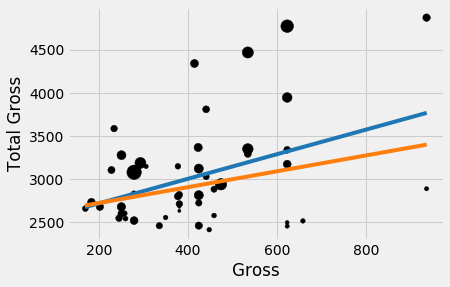

In [217]:
# Do not change any of the code in this cell. 

# You don't have to answer any questions here or understand how this cell works: 
# it just shows you the result of your work.
x = actors.column('Gross')
y = actors.column('Total Gross')
weights = actors.column('Number of Movies')

x_plot = make_array(169, 937)
regression_line = x_plot * slope(actors, 'Gross', 'Total Gross') + intercept(actors, 'Gross', 'Total Gross')
weighted_line = x_plot * best_weighted_slope + best_weighted_intercept
plots.figure()
plots.scatter(x, y, s=(weights ** 2) / 30, c='black')
plots.plot(x_plot, regression_line, color='tab:blue')
plots.plot(x_plot, weighted_line, color='tab:orange')
plots.xlabel('Gross')
plots.ylabel('Total Gross');

# Question 7: US Counties and Food Deserts

A [food desert](https://en.wikipedia.org/wiki/Food_desert) is an area that has limited access to nutritious food. In this question, we'll look at food access data for US counties from 2010 to 2015.


In [218]:
food_access = Table.read_table('food_access_2010_2015.csv')
food_access.show(3)

county,state,population,housing_units,urban_pct,low_access_1,low_access_10,low_access_20,carless_pct
Abbeville,SC,25417,9990,16.6667,21510,5176,0,8.5
Acadia,LA,61773,22841,50,32874,625,0,8.9
Accomack,VA,33164,13798,0,26847,727,0,9.7


The `food_access` table contains one row for each county in the 50 states of the US.

It has the following columns:
* **`county`**: a string, the name of the county
* **`population`**: an int, the number of people living in that county
* **`state`**: a string, the two-letter abbreviation for the state the county is in
* **`housing_units`**: an int, the number of housing units available in the county
* **`urban_pct`**: a float between 0 and 100, the percentage of housing units that are urban in the county
* **`low_access_20`**: an int, the number of people in that county living more than twenty miles away from their nearest grocery store
* **`low_access_10`**: an int, the number of people in that county living more than ten miles away from their nearest grocery store (includes people living more than twenty miles away)
* **`low_access_1`**: an int, the number of people in that county living more than one mile away from their nearest grocery store (includes people living more than 10 and 20 miles away)
* **`carless_pct`**: a float between 0 and 100, the percentage of people in that county who don't have a car in their household

In this question, you'll also work with the `states` table:

In [219]:
states = Table.read_table('states.csv')
states.show(3)

State,State Code,Region,Division
Alaska,AK,West,Pacific
Alabama,AL,South,East South Central
Arkansas,AR,South,West South Central


For each state, the table has:
* **`State`**: a string, the name of the state
* **`State Code`**: a string, the two-letter abbreviation for the state
* **`Region`**: a string, which region the state belongs to
* **`Division`**: a string, which division the state belongs to

If you're curious about what the regions and divisions are (and what the difference between them is), see [this map from the US Census Bureau](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf).

### Part 1: Table manipulation

For each of the following questions, write Python code that computes (or draws) the specified quantity, table, or graph.

#### Question 7.1.1

(2 points) The number of people living more than 10 miles away from a grocery store in Alameda County, where UC Berkeley is.

<!--
BEGIN QUESTION
name: q7_1_1
manual: false
-->

In [220]:
num_people_more_than_10_miles_away_alameda_county = food_access.where("state",are.equal_to("CA")).where("county",are.equal_to("Alameda")).select("low_access_10").column(0).item(0)
num_people_more_than_10_miles_away_alameda_county

111

In [221]:
ok.grade("q7_1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



*Just for fun*: Same as the above question, but for any other county in California that you've lived in or spent time in. Do the results surprise you?

In [222]:
# This cell is for answering the "Just for fun" question above. Nothing in it will be graded.
food_access.where("state",are.equal_to("CA")).where("county",are.equal_to("Contra Costa"))


county,state,population,housing_units,urban_pct,low_access_1,low_access_10,low_access_20,carless_pct
Contra Costa,CA,1049025,375364,97.1154,277660,0,0,5.9


#### Question 7.1.2

(3 points) The county in California that has the most people living far away (>10 miles) from a grocery store. The abbreviation for California is CA.

<!--
BEGIN QUESTION
name: q7_1_2
manual: false
-->

In [223]:

california_county_most_food_deserted = food_access.where("state",are.equal_to("CA")).sort("low_access_10", descending=True).take(0).column(0).item(0)
california_county_most_food_deserted

'Fresno'

In [224]:
ok.grade("q7_1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 7.1.3

(6 points) A table `biggest_state_for_each_division` with the largest state (by population) in each **division** (not region). It should have **one row for each division**, and two columns: one with the name of the division, and one with the name (not the two letter abbreviation) of the most populated state in that division. The names of the columns don't matter, but they must be in that order (division column first, state column second). 

For example, the most populated state in the Pacific division is California, so one of the rows in your table should have as its first item  the string `Pacific` and as its second item the string `California`.

(*Hint*: you may find the `first` function helpful: we've defined it for you here.)

<!--
BEGIN QUESTION
name: q7_1_3
manual: false
-->

In [225]:
def first(arr):
    return arr.item(0)

state_populations =food_access.join("state",states,"State Code")
z=state_populations.group("state",sum).select(0,2).join("state",states,"State Code").drop(0,3)
bb=z.sort("population sum",descending=True)
East_North_Central=first(bb.where("Division",are.equal_to("East North Central"))).drop(0)
East_South_Central=first(bb.where("Division",are.equal_to("East South Central"))).drop(0)
Middle_Atlantic=first(bb.where("Division",are.equal_to("Middle Atlantic"))).drop(0)
Mountain=(bb.where("Division",are.equal_to("Mountain"))).drop(0)
New_England=first(bb.where("Division",are.equal_to("New England"))).drop(0)
Pacific=first(bb.where("Division",are.equal_to("Pacific"))).drop(0)
South_Atlantic=first(bb.where("Division",are.equal_to("South Atlantic"))).drop(0)
West_North_Central=first(bb.where("Division",are.equal_to("West North Central"))).drop(0)
West_South_Central=first(bb.where("Division",are.equal_to("West South Central"))).drop(0)


biggest_state_for_each_division = Table().with_columns("Division",make_array("East North Central","East South Central","Middle Atlantic","Mountain",
                                           "New England","Pacific","South Atlantic","West North_Central","West South Central"),
                    "State",make_array(East_North_Central.column(0).item(0),East_South_Central.column(0).item(0),Middle_Atlantic.column(0).item(0),
                     Mountain.column(0).item(0),New_England.column(0).item(0),Pacific.column(0).item(0),South_Atlantic.column(0).item(0),
                                       West_North_Central.column(0).item(0),
                     West_South_Central.column(0).item(0)))
biggest_state_for_each_division

Division,State
East North Central,Illinois
East South Central,Tennessee
Middle Atlantic,New York
Mountain,Arizona
New England,Massachusetts
Pacific,California
South Atlantic,Florida
West North_Central,Missouri
West South Central,Texas


In [226]:
ok.grade("q7_1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Part 2: relationships between quantities

For the rest of this question, instead of looking at the number of people without access to a grocery store, we'll look at the percentage.

We'll use the following terms:

* *low access at 1 mile*: the percentage of people in a county whose nearest grocery store is at least 1 mile away
* *low access at 10 miles*: the percentage of people in a county whose nearest grocery store is at least 10 miles away

In [227]:
food_access_with_pcts = food_access.with_columns(
    'low_access_1_pct', food_access.column('low_access_1') / food_access.column('population') * 100,
    'low_access_10_pct', food_access.column('low_access_10') / food_access.column('population') * 100,
    'low_access_20_pct', food_access.column('low_access_20') / food_access.column('population') * 100,
).drop('low_access_1', 'low_access_10', 'low_access_20')
food_access_with_pcts.show(3)

county,state,population,housing_units,urban_pct,carless_pct,low_access_1_pct,low_access_10_pct,low_access_20_pct
Abbeville,SC,25417,9990,16.6667,8.5,84.6284,20.3643,0
Acadia,LA,61773,22841,50,8.9,53.2174,1.01177,0
Accomack,VA,33164,13798,0,9.7,80.9522,2.19214,0


#### Question 7.2.1

(2 points) Create one plot that you'd use to answer the following question. You'll use your plot to answer the related multiple choice question below, but you do **not** have to answer the question directly, only create a plot.

Is there any association between the percentage of urban housing and low access at **10 miles** in US counties?

<!--
BEGIN QUESTION
name: q7_2_1
manual: true
-->
<!-- EXPORT TO PDF -->

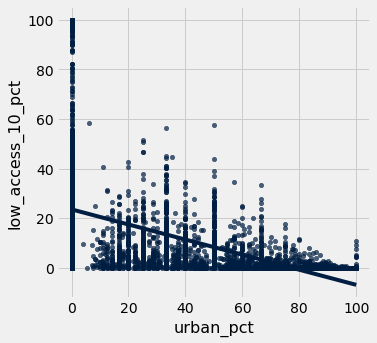

In [228]:
# Code to generate your plot goes here
food_access_with_pcts.scatter("urban_pct","low_access_10_pct",fit_line=True)

In [229]:
correlation(food_access_with_pcts,"urban_pct","low_access_10_pct")

-0.4397184676471795

#### Question 7.2.2

(3 points) Based only on the data in the table (and the graph you created using that data), which must be true? Assign `low_access_10_urban_choices` to an array with your numbered answer(s).
1. Knowing the percentage of urban housing in a county cannot help us predict low access at 10 miles.
2. There is a strong linear association between percentage of urban housing and low access at 10 miles.
3. The distribution of low access at 10 miles is different between non-urban counties (<5% urban housing) and other counties.
4. For counties that are very urban (>80% urban housing), more than half of their population is within 10 miles of a grocery store.

<!--
BEGIN QUESTION
name: q7_2_2
manual: true
-->
<!-- EXPORT TO PDF -->

In [230]:
low_access_10_urban_choices = make_array(1,4)

#### Question 7.2.3

(2 points) Create one plot that you'd use to answer the following question. You do not have to answer the question directly, only create a plot.

Is there any association between the percentage of urban housing and low access at **1 mile** in US counties?
<!--
BEGIN QUESTION
name: q7_2_3
manual: true
-->
<!-- EXPORT TO PDF -->

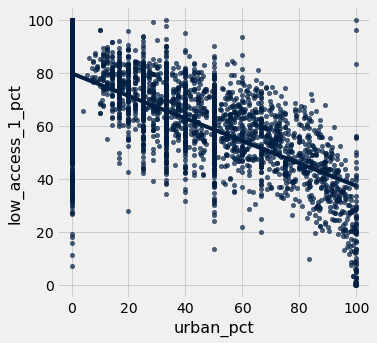

In [231]:
# Code to generate your plot goes here
food_access_with_pcts.scatter("urban_pct","low_access_1_pct",fit_line=True)

#### Question 7.2.4

(2 points) What is the correlation between percentage of urban housing and low access at 1 mile?

(*Hint*: You may find it helpful to use some of the functions defined in the "Useful functions" section near the top of this notebook).

<!--
BEGIN QUESTION
name: q7_2_4
manual: false
-->

In [232]:
correlation_urban_low1 = correlation(food_access_with_pcts,"urban_pct","low_access_1_pct")
correlation_urban_low1

-0.6871958281943565

In [233]:
ok.grade("q7_2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# Question 8: Likes on Instagram

Natalia, an engineer at Instagram, conducts a randomized controlled experiment to evaluate whether social media anxiety is **reduced** when users can't see the number of likes shown on a post. When the next Instagram software update ships, she randomly assigns users in the city of Berkeley to two groups:
* **Group A**: 10,000 users who can no longer see the number of likes, and
* **Group B**: 8,000 users who can still see the number of likes.

One month after shipping the new update, she measures each user's happiness and general sentiment towards Instagram with a survey. She wants to test the claim that the treatment, **hiding the number of likes, increases users' happiness scores**.

She prepares a table `instagram_users`, containing 18,000 rows, one for each user in her experiment. She can't share the full dataset with you since it's proprietary, but she chooses 3 random rows to show you, just so you can see what it looks like:

In [234]:
instagram_users = Table.read_table('instagram_sample.csv')
instagram_users

sex,age,group,happiness,sentiment
Female,15,A,72,Positive
Female,31,B,53,Negative
Male,27,B,60,Neutral


In [235]:
instagram_users.sample(with_replacement=False)

sex,age,group,happiness,sentiment
Male,27,B,60,Neutral
Female,31,B,53,Negative
Female,15,A,72,Positive


* **`sex`**: a string, the user's sex (`Male` or `Female`)
* **`age`**: an int, the user's age
* **`group`**: a string, the user's group for the experiment (`A` or `B`)
* **`happiness`**: an int, the user's happiness score from the survey (between 0-100)
* **`sentiment`**: a string, the user's sentiment from the survey (`Positive`, `Neutral`, or `Negative`)

Natalia's null hypothesis is that there is no difference in average happiness between people who see the number of likes compared to those who don't, and that any difference observed in the sample is due to chance.

For her test statistic, Natalia decides to use the difference between the average happiness scores of Group A and Group B (that is, the average of Group A minus the average of Group B).

Help her come up with an alternative hypothesis:

#### Question 8.1

(3 points) State an alternative hypothesis that she should use for her test. 

<!--
BEGIN QUESTION
name: q8_1
manual: true
-->
<!-- EXPORT TO PDF -->

Natalia's alternative hypothesis is that there is a difference in average happiness between people who see the number of likes compared to those who don't, and that any difference observed in the sample is due to chance.

#### Question 8.2

(6 points) Natalia asks her coworker for help simulating one value of the test statistic under the null hypothesis, but the code he gives her has some mistakes. Fix the code below so that it correctly computes the test statistic under the null hypothesis.
<!--
BEGIN QUESTION
name: q8_2
manual: true
-->
<!-- EXPORT TO PDF -->

In [236]:
# This code contains mistakes that you need to fix.

def compute_instagram_test_statistic():
    # Shuffle the data
    shuffled_groups = instagram_users.select('group').sample(with_replacement = False).column("group")

    users = instagram_users.drop("group").with_columns("shuffled_groups",shuffled_groups)
    # Two averages
    mean_A = np.average(users.where("shuffled_groups","A").select("happiness").column(0))
    mean_B = np.average(users.where("shuffled_groups","B").select("happiness").column(0))
    # Test statistic
    return (mean_A - mean_B)
compute_instagram_test_statistic()


-13.0

#### Question 8.3

(4 points) In the question above, why do we shuffle the data? Choose all that apply. Assign `instagram_shuffling_reasons` to an array with your numbered answer(s).

1. Under the null hypothesis, the label of being in group A or group B doesn't matter.
2. We want to randomize treatment and control to establish causation.
3. We want to simulate two groups of people whose expected happiness is identical under the null hypothesis.
4. We want to ensure that the users in the experiment are selected randomly.

<!--
BEGIN QUESTION
name: q8_3
manual: true
-->
<!-- EXPORT TO PDF -->

In [237]:
instagram_shuffling_reasons = make_array(1,3,4)
instagram_shuffling_reasons

array([1, 3, 4])

Natalia fixes the code, and simulates 10,000 values of the test statistic under the null hypothesis. She shows them in the histogram below. You should assume that the histogram shows all of the simulated values.

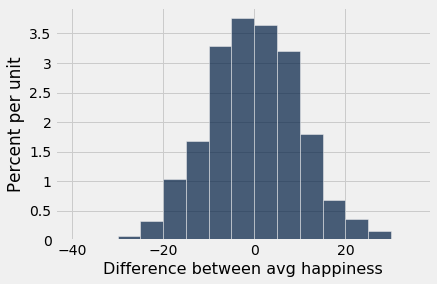

#### Question 8.4

(4 points) Based on this histogram, which of the following must be true? Assign `instagram_null_simulation_choices` to an array with your numbered answer(s).

1. Seeing the number of likes on a post has a positive effect on user happiness.
2. Seeing the number of likes on a post has no effect on user happiness.
3. If the $p$-value cutoff for the test is 0.01 and the observed test statistic is 35, then we should conclude the data are more consistent with the alternative hypothesis.
4. If the $p$-value cutoff for the test is 0.05 and the observed test statistic is 10,  then we should conclude the data are more consistent with the null hypothesis.
5. Seeing the number of likes on a post has a negative effect on user happiness.

<!--
BEGIN QUESTION
name: q8_4
manual: true
-->
<!-- EXPORT TO PDF -->

In [238]:
instagram_null_simulation_choices = (2,3,4)

#### Question 8.5

(5 points) Suppose Natalia tells you the observed test statistic was 42. Which conclusion(s) are the data consistent with? Assign `instagram_test_conclusion_choices` to an array with your numbered answer(s).

1. The difference in happiness scores between group A and group B is due to chance alone
2. The treatment has a negative association with happiness scores
3. The treatment has a positive effect on happiness scores
4. The treatment increases users' happiness scores by 42 points.
5. The data support the null hypothesis.
6. The data support the alternative hypothesis.
7. There isn't enough information to make a conclusion of any kind.

<!--
BEGIN QUESTION
name: q8_5
manual: true
-->
<!-- EXPORT TO PDF -->

In [239]:
instagram_test_conclusion_choices = make_array(1,6)

For the remainder of this question, instead of testing for an increase in happiness scores, Natalia would like to test whether the treatment (i.e. hiding the number of likes) changes users' `sentiment`: that is, she's only interested in seeing whether the sentiment is significantly different.

Recall from the table above that `sentiment` is measured as either `Positive`, `Neutral`, or `Negative`.

She comes up with the following alternative hypothesis:

*The distribution of user sentiment between treatment (hiding the number of likes) and control (showing the number of likes) is different.*

Provide a null hypothesis and a test statistic she could use for her test.

In [240]:
instagram_users.sample()


sex,age,group,happiness,sentiment
Female,15,A,72,Positive
Female,31,B,53,Negative
Female,15,A,72,Positive


#### Question 8.6

(3 points) Null hypothesis:
<!--
BEGIN QUESTION
name: q8_6
manual: true
-->
<!-- EXPORT TO PDF -->

That the distribution of user sentiment between treatment and control is the same, and there is no change, anything else is due to random chance

#### Question 8.7

(3 points) What would be a valid test statistic to tell the two hypotheses above apart?

<!--
BEGIN QUESTION
name: q8_7
manual: true
-->
<!-- EXPORT TO PDF -->

A valid test would be to do a foor loop and than use abs(compute_instagram_test_statistic()) you would expect the lower values to support the null and higher values to support the alternative and anything else is due to random chance.

#### Question 8.8

(3 points) Natalia and her coworker are deciding whether to roll this feature out worldwide. Her coworker wants to collect more data, and develops a sentiment analysis algorithm that analyzes the content of users' posted images and captions to automatically determine their sentiment (positive, negative, or neutral).

Describe, in two sentences or less, any privacy concerns that you would have around the collection of this data.

*Hint*: this question is more open-ended than most of the rest of this exam: there isn't only one correct answer.
<!--
BEGIN QUESTION
name: q8_8
manual: true
-->
<!-- EXPORT TO PDF -->

I don't think that this kind of anaylsis algorithm would actually analyz the content correctly based on posted image and caption because there to many factors to determine that, for example a picture might be a creative picture with hidden meaning and the algorithm can easily mistaken it for anything. I feel like it would also make people feel in a certain way as a algorithm determines if their drawing is postive, negative which can cause people to feel judged.

# Question 9: Bread

## Part 1: Frozen slices

Ilin bakes too much bread, so she decides to slice it and put it in her freezer. She has three loaves of bread: one rye, one sourdough, and one multigrain. She slices each loaf: **the rye bread has 8 slices, the sourdough bread has 5 slices, and the multigrain bread has 12 slices**. In each loaf, two of the slices are "heels" (the slice at each end). She puts all the slices into a giant bag and mixes them up. Each day, she pulls out one slice at random, toasts it, and eats it.

#### Question 9.1.1

(2 points) What is the probability that her first slice is sourdough?

<!--
BEGIN QUESTION
name: q9_1_1
manual: false
-->

In [139]:
slice_sourdough = 5/25
slice_sourdough

0.2

In [140]:
ok.grade("q9_1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 9.1.2

(3 points) What is the probability that in her first two slices, she doesn't get any sourdough?

<!--
BEGIN QUESTION
name: q9_1_2
manual: false
-->

In [141]:
no_sourdough = ((20/25)*(19/24))
no_sourdough

0.6333333333333333

In [142]:
ok.grade("q9_1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 9.1.3

(3 points) What is the probability that the first three slices are all heels?
<!--
BEGIN QUESTION
name: q9_1_3
manual: false
-->

In [143]:
three_heels = (6/25)*(5/24)*(4/23)
three_heels

0.008695652173913044

In [144]:
ok.grade("q9_1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 9.1.4

(3 points) The first slice she pulls out is a heel. What is the probability that it is sourdough?

<!--
BEGIN QUESTION
name: q9_1_4
manual: false
-->

In [145]:
sourdough_heel = (2/6)
sourdough_heel

0.3333333333333333

In [146]:
ok.grade("q9_1_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 2: Quality control

Jin is in charge of quality control at a very large bakery that makes tens of thousands of loaves of bread each day. Each loaf is advertised as weighing 500 grams, but the exact weight varies a little bit from loaf to loaf.

Jin has had complaints from customers that their bread weighed less than 500 grams. He speaks with the bakers, who assure him that the average loaf weighs 500 grams, and that the standard deviation of the loaf weights is 5 grams. They show him the following histogram of distribution of weights that the loaves are supposed to follow.

According to the bakers, the distribution of weights in the population of loaves is as follows:

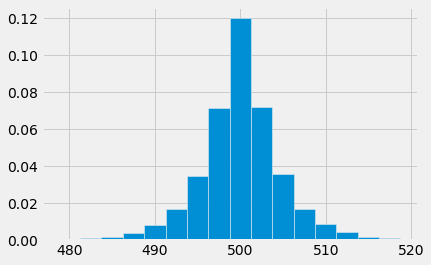

#### Question 9.2.1

(4 points) To verify this, he plans to hire 10,000 auditors to come into the bakery, and each one will randomly sample 100 loaves and weigh them. Each auditor will then tell Jin the average weight of the 100 loaves that they weighed.

Assuming the population distribution information above is correct, about how many of the 10,000 auditors will find an average weight below 499 grams? Your response should be a number between 0 and 10,000.

*Hint*: you should compute your answer using arithmetic from the information given, not using a simulation.

<!--
BEGIN QUESTION
name: q9_2_1
manual: false
-->

In [154]:

auditors_avg_below_499 = 99/np.sqrt(10000)*10000
auditors_avg_below_499

9900.0

In [155]:
ok.grade("q9_2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 9.2.2

(4 points) When Jin discusses this idea with his peers, they tell him it's much too expensive. Instead, they suggest hiring one auditor, and asking the auditor to collect a slightly larger random sample of 225 loaves.

Assuming the population distribution information above is correct, approximately what is this probability that the auditor will find an average weight below 499 grams? Your response should be a number between 0 and 1.

You should compute your answer using arithmetic from the information given, not using a simulation.

<!--
BEGIN QUESTION
name: q9_2_2
manual: false
-->

In [241]:

prob_auditors_avg_below_499 = 1/np.sqrt(225)
prob_auditors_avg_below_499

0.06666666666666667

In [242]:
ok.grade("q9_2_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [243]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 100% complete
Submission successful for user: wajakhan@berkeley.edu
URL: https://okpy.org/cal/data8/sp20/final_sp20/submissions/krwM4J



In [244]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t